# Study of the Correlations and Regularized Methods

In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold

# 1 - Correlations

In [7]:
df = pd.read_csv('building_energy_data_final-2.csv')

In [8]:
#df.index = df['Parcel(s)']
df = df.drop(['Unnamed: 0'], axis=1, errors='coerce')

In [9]:
df

,Parcel(s),year,Benchmark Status,ENERGY STAR Score,Percent Better than National Median Site EUI,Percent Better than National Median Source EUI,Percentage Better than National Median Source EUI,Reason for Exemption,Site EUI (kBtu/ft2),Source EUI (kBtu/ft2),...,Year Built,Energy Audit Due Date,Energy Audit Status,Previous Year ENERGY STAR Score,Two Years Ago ENERGY STAR Score,Current Year YoY Change,Previous Year YoY Change,Age In Years,Recalculated GHG Emissions Intensity (kgCO2e/ft2),Is Downtown
0,0010/001,2012,Complied,81.0,-34.5,NaN,NaN,NaN,71.0,149.9,...,1907.0,2023-04-01T00:00:00.000,Upcoming,NaN,NaN,NaN,NaN,105.0,5.209650,False
1,0010/001,2013,Complied,74.0,-26.2,-26.2,NaN,NaN,81.3,166.9,...,1907.0,2023-04-01T00:00:00.000,Upcoming,81.0,NaN,-7.0,NaN,106.0,5.883673,False
2,0010/001,2014,Complied,56.0,-6.5,-6.5,NaN,NaN,73.4,158.5,...,1907.0,2023-04-01T00:00:00.000,Upcoming,74.0,81.0,-18.0,-7.0,107.0,5.003927,False
3,0010/001,2015,Complied,72.0,-23.0,-23.0,NaN,NaN,72.0,153.9,...,1907.0,2023-04-01T00:00:00.000,Upcoming,56.0,74.0,16.0,-18.0,108.0,4.886478,False
4,0010/001,2016,Complied,75.0,-26.3,-26.3,NaN,NaN,68.2,149.7,...,1907.0,2023-04-01T00:00:00.000,Upcoming,72.0,56.0,3.0,16.0,109.0,4.880494,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,9900/278,2015,Complied,16.0,48.4,48.4,NaN,NaN,176.2,287.7,...,0.0,2099-04-01T00:00:00.000,Exempt - Municipal,20.0,25.0,-4.0,-5.0,2015.0,10.753240,True
6594,9900/278,2016,Complied,42.0,8.0,8.0,NaN,NaN,136.3,207.1,...,0.0,2099-04-01T00:00:00.000,Exempt - Municipal,16.0,20.0,26.0,-4.0,2016.0,8.270243,True
6595,9900/278,2017,Complied,47.0,2.4,2.4,NaN,NaN,123.1,198.4,...,0.0,2099-04-01T00:00:00.000,Exempt - Municipal,42.0,16.0,5.0,26.0,2017.0,7.288592,True
6596,9900/278,2018,Complied,42.0,10.1,10.1,NaN,NaN,108.7,167.6,...,0.0,2099-04-01T00:00:00.000,Exempt - Municipal,47.0,42.0,-5.0,5.0,2018.0,6.300526,True


In [10]:
df_ = df[['Parcel(s)', 'year', 'Benchmark Status', 'ENERGY STAR Score',
       'Percent Better than National Median Site EUI',
       'Site EUI (kBtu/ft2)', 
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/ft2)',
       'Weather Normalized Site EUI (kBtu/ft2)',
       'Floor Area',
       'Property Type', 'Property Type - Self Selected', 
       'Year Built', 
       'Previous Year ENERGY STAR Score', 
       'Two Years Ago ENERGY STAR Score',
       'Current Year YoY Change', 
       'Previous Year YoY Change', 'Age In Years',
       'Recalculated GHG Emissions Intensity (kgCO2e/ft2)']]

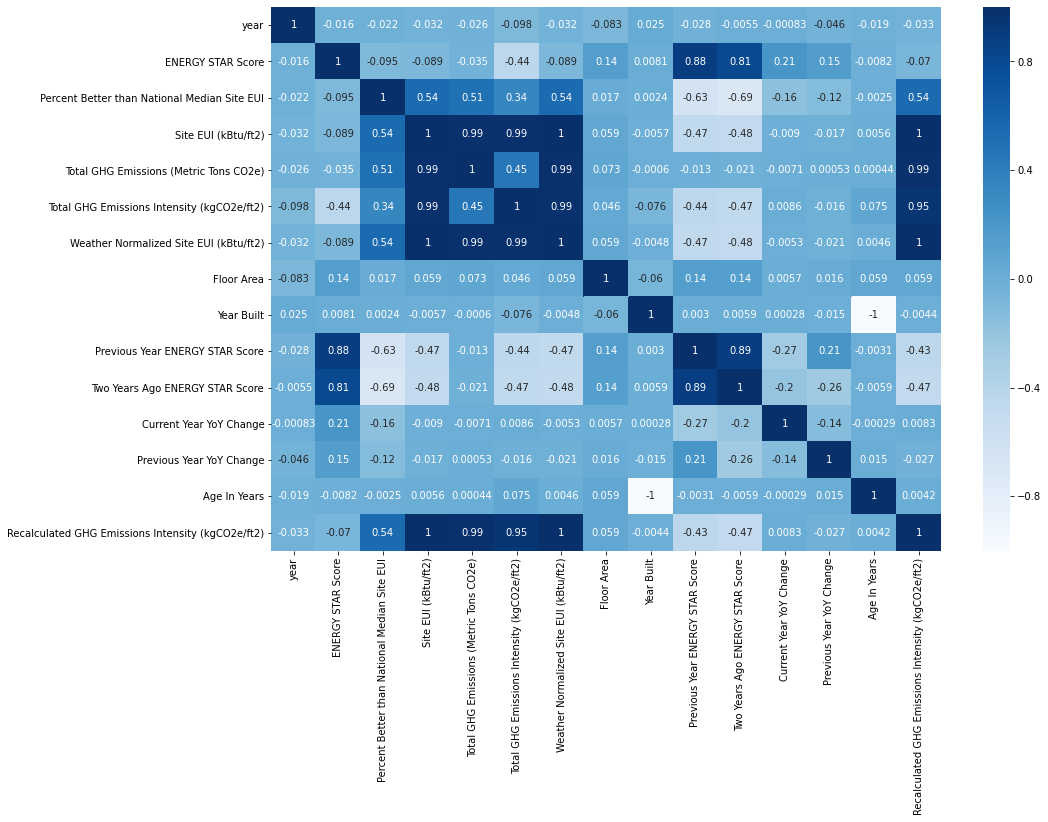

In [11]:
correlation_data = df_

# Correlation matrix 
corr = correlation_data.corr() 
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15,10)) 
sns.heatmap(corr, annot=True, cmap="Blues") 
#plt.tight_layout()
plt.show()

In [12]:
corr

,year,ENERGY STAR Score,Percent Better than National Median Site EUI,Site EUI (kBtu/ft2),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft2),Weather Normalized Site EUI (kBtu/ft2),Floor Area,Year Built,Previous Year ENERGY STAR Score,Two Years Ago ENERGY STAR Score,Current Year YoY Change,Previous Year YoY Change,Age In Years,Recalculated GHG Emissions Intensity (kgCO2e/ft2)
year,1.000000,-0.016093,-0.021584,-0.032015,-0.026049,-0.097866,-0.032022,-0.083457,0.025146,-0.028453,-0.005462,-0.000828,-0.046463,-0.019057,-0.033393
ENERGY STAR Score,-0.016093,1.000000,-0.095132,-0.089307,-0.034649,-0.435252,-0.089301,0.141411,0.008115,0.883567,0.809113,0.211719,0.152967,-0.008225,-0.070332
Percent Better than National Median Site EUI,-0.021584,-0.095132,1.000000,0.541813,0.505267,0.339019,0.541836,0.017363,0.002399,-0.629496,-0.692431,-0.157385,-0.121866,-0.002531,0.539781
Site EUI (kBtu/ft2),-0.032015,-0.089307,0.541813,1.000000,0.988061,0.986231,0.999996,0.058741,-0.005749,-0.468445,-0.480293,-0.008966,-0.017262,0.005557,0.998786
Total GHG Emissions (Metric Tons CO2e),-0.026049,-0.034649,0.505267,0.988061,1.000000,0.448133,0.988128,0.073425,-0.000604,-0.013241,-0.021322,-0.007109,0.000529,0.000444,0.991470
Total GHG Emissions Intensity (kgCO2e/ft2),-0.097866,-0.435252,0.339019,0.986231,0.448133,1.000000,0.985179,0.045976,-0.075547,-0.444390,-0.465335,0.008604,-0.016142,0.075061,0.949241
Weather Normalized Site EUI (kBtu/ft2),-0.032022,-0.089301,0.541836,0.999996,0.988128,0.985179,1.000000,0.058921,-0.004813,-0.468582,-0.479767,-0.005291,-0.020566,0.004619,0.998786
Floor Area,-0.083457,0.141411,0.017363,0.058741,0.073425,0.045976,0.058921,1.000000,-0.059654,0.144040,0.139260,0.005700,0.016218,0.059143,0.059073
Year Built,0.025146,0.008115,0.002399,-0.005749,-0.000604,-0.075547,-0.004813,-0.059654,1.000000,0.002986,0.005884,0.000282,-0.015232,-0.999981,-0.004384
Previous Year ENERGY STAR Score,-0.028453,0.883567,-0.629496,-0.468445,-0.013241,-0.444390,-0.468582,0.144040,0.002986,1.000000,0.889080,-0.270621,0.214960,-0.003136,-0.433598


# 2 - Regressions
## Recall the OLS Regression

In [13]:
property_dummies = pd.get_dummies(df['Property Type'])
benchmark_dummies = pd.get_dummies(df['Benchmark Status'])
df['Is Downtown'] = df['Is Downtown'].astype(int)

dummies_all = pd.concat([property_dummies, benchmark_dummies], axis = 1)

df_dummies = pd.concat([df, dummies_all], axis = 1)

In [14]:
features_relevant = ['year',
                    'Benchmark Status', 
                    'Percent Better than National Median Site EUI', 
                    'Percent Better than National Median Source EUI', 
                    'Site EUI (kBtu/ft2)',
                    'Source EUI (kBtu/ft2)',
                    'Total GHG Emissions (Metric Tons CO2e)', 
                    'Weather Normalized Site EUI (kBtu/ft2)', 
                    'Weather Normalized Source EUI (kBtu/ft2)', 
                    'Postal Code',
                    'Floor Area', 
                    'Property Type',
                    'Property Type - Self Selected',
                    'Previous Year ENERGY STAR Score',
                    'Two Years Ago ENERGY STAR Score',
                    'Current Year YoY Change', 
                    'Previous Year YoY Change',
                    'Age In Years',
                    'Recalculated GHG Emissions Intensity (kgCO2e/ft2)',
                    'Is Downtown']

In [15]:
lm_data1 = df_dummies[features_relevant + dummies_all.columns.to_list() + ['ENERGY STAR Score']]

lm_data1 = lm_data1.drop(['Benchmark Status',
                         'Postal Code',
                         'Property Type',
                         'Property Type - Self Selected',
                          'Two Years Ago ENERGY STAR Score',
                         'Weather Normalized Source EUI (kBtu/ft2)',
                         'Percent Better than National Median Source EUI',
                         'Current Year YoY Change',
                         'Total GHG Emissions (Metric Tons CO2e)',
                         'Source EUI (kBtu/ft2)',
                         'Age In Years'], axis = 1)

lm_data1 = lm_data1.dropna()
nunique_df = lm_data1.apply(pd.Series.nunique)
cols_to_drop = nunique_df[nunique_df == 1].index
lm_data1 = lm_data1.drop(cols_to_drop, axis = 1)

X_train = lm_data1[~lm_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis = 1)
y_train = lm_data1[~lm_data1['year']. isin(['2018', '2019'])][['ENERGY STAR Score']]

X_test = lm_data1[lm_data1['year'].isin(['2018', '2019'])].drop(['year', 'ENERGY STAR Score'], axis = 1)
y_test = lm_data1[lm_data1['year'].isin(['2018', '2019'])][['ENERGY STAR Score']]

In [16]:
est = sm.OLS(y_train, X_train).fit()
print(est.summary())



                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1939.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        07:53:46   Log-Likelihood:                -9973.3
No. Observations:                2765   AIC:                         1.997e+04
Df Residuals:                    2754   BIC:                         2.003e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

## Comparison with Regularized Methods (Ridge, Lasso and Elastic Net)

In [20]:
from sklearn.metrics import r2_score
y_pred = est.predict(X_test)
print(r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

0.8109496927837656
MSE 108.32440933482047


In [22]:
from sklearn.model_selection import RepeatedKFold

ridge_gs = Ridge()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)


search_r = GridSearchCV(ridge_gs, grid, scoring='r2', cv=cv, n_jobs=-1)


results = search_r.fit(X_train, y_train)

In [27]:
lasso_gs = Lasso()

search_l = GridSearchCV(lasso_gs, grid, scoring = 'r2', cv = cv, n_jobs = -1)

results_l = search_l.fit(X_train, y_train)

/Users/ruilapuskas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70451.0448925725, tolerance: 176.8178002169982
  positive)


In [28]:
grid_en = dict()
grid_en['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid_en['l1_ratio'] = np.arange(0,1,0.01)

elnet_gs = ElasticNet()

search_en = GridSearchCV(elnet_gs, grid_en, scoring = 'r2', cv = cv, n_jobs = -1)

results_en = search_en.fit(X_train, y_train)

/Users/ruilapuskas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101159.38586027267, tolerance: 176.8178002169982
  positive)


In [29]:
print('Best alpha for Ridge' , results.best_params_)
print('Best alpha for Lasso' , results_l.best_params_)
print('Best alpha and l1 ratio for Elastic Net', results_en.best_params_)

Best alpha for Ridge {'alpha': 0.99}
Best alpha for Lasso {'alpha': 0.03}
Best alpha and l1 ratio for Elastic Net {'alpha': 0.1, 'l1_ratio': 0.06}


In [30]:
y_pred_lasso = Lasso(alpha = 0.03).fit(X_train, y_train).predict(X_test)
y_pred_ridge = Ridge(alpha = 0.99).fit(X_train, y_train).predict(X_test)
y_pred_en = ElasticNet(alpha = 0.1, l1_ratio = 0.06).fit(X_train, y_train).predict(X_test)

/Users/ruilapuskas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70451.0448925725, tolerance: 176.8178002169982
  positive)
/Users/ruilapuskas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101159.38586027267, tolerance: 176.8178002169982
  positive)


In [31]:
print('Performance on test set for Ridge:', r2_score(y_test, y_pred_ridge))
print('Performance on test set for Lasso:', r2_score(y_test, y_pred_lasso))
print('Performance on test set for ElasticNet:', r2_score(y_test, y_pred_en))
print('------------------------------------------------------')
print('Performance on the test set of OLS:', r2_score(y_test, y_pred))

Performance on test set for Ridge: 0.8109915579547795
Performance on test set for Lasso: 0.8107568252040624
Performance on test set for ElasticNet: 0.8109752243308125
------------------------------------------------------
Performance on the test set of OLS: 0.8109496927837656
